In [43]:
import nltk
import string
import tensorflow
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Input


nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **Input Text**

In [16]:
text = """Dr. John Smith, a renowned scientist, visited the United Nations in New York on Jan. 5th, 2022.
He gave a lecture on climate change and its global effects.
Thousands of people attended the event, including media personnel."""


# **First Remove html tags**

# **Perform Sentence Tokenization**

In [17]:
sentences = sent_tokenize(text)
print(sentences)

['Dr. John Smith, a renowned scientist, visited the United Nations in New York on Jan. 5th, 2022.', 'He gave a lecture on climate change and its global effects.', 'Thousands of people attended the event, including media personnel.']


# **Perform Word Tokenization**

In [18]:
tokens = [word_tokenize(sent) for sent in sentences]
print(tokens)

[['Dr.', 'John', 'Smith', ',', 'a', 'renowned', 'scientist', ',', 'visited', 'the', 'United', 'Nations', 'in', 'New', 'York', 'on', 'Jan.', '5th', ',', '2022', '.'], ['He', 'gave', 'a', 'lecture', 'on', 'climate', 'change', 'and', 'its', 'global', 'effects', '.'], ['Thousands', 'of', 'people', 'attended', 'the', 'event', ',', 'including', 'media', 'personnel', '.']]


# **Lower Casing the Words**

In [19]:
tokens = [[word.lower() for word in sent] for sent in tokens]
print(tokens)

[['dr.', 'john', 'smith', ',', 'a', 'renowned', 'scientist', ',', 'visited', 'the', 'united', 'nations', 'in', 'new', 'york', 'on', 'jan.', '5th', ',', '2022', '.'], ['he', 'gave', 'a', 'lecture', 'on', 'climate', 'change', 'and', 'its', 'global', 'effects', '.'], ['thousands', 'of', 'people', 'attended', 'the', 'event', ',', 'including', 'media', 'personnel', '.']]


# **Removing Stopwords**

In [20]:
stop_words = set(stopwords.words('english'))

tokens_no_stop = [[word for word in sent if word not in stop_words] for sent in tokens]
print(tokens_no_stop)

[['dr.', 'john', 'smith', ',', 'renowned', 'scientist', ',', 'visited', 'united', 'nations', 'new', 'york', 'jan.', '5th', ',', '2022', '.'], ['gave', 'lecture', 'climate', 'change', 'global', 'effects', '.'], ['thousands', 'people', 'attended', 'event', ',', 'including', 'media', 'personnel', '.']]


# **Remove Punctuation**

In [21]:
punctuations = set(string.punctuation)

tokens_no_punct = [[word for word in sent if word not in punctuations] for sent in tokens_no_stop]
print(tokens_no_punct)

[['dr.', 'john', 'smith', 'renowned', 'scientist', 'visited', 'united', 'nations', 'new', 'york', 'jan.', '5th', '2022'], ['gave', 'lecture', 'climate', 'change', 'global', 'effects'], ['thousands', 'people', 'attended', 'event', 'including', 'media', 'personnel']]


# **Lemmatization**

In [23]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [24]:
lemmatizer = WordNetLemmatizer()

filtered = [[lemmatizer.lemmatize(word) for word in sent] for sent in tokens_no_punct]
print(filtered)

[['dr.', 'john', 'smith', 'renowned', 'scientist', 'visited', 'united', 'nation', 'new', 'york', 'jan.', '5th', '2022'], ['gave', 'lecture', 'climate', 'change', 'global', 'effect'], ['thousand', 'people', 'attended', 'event', 'including', 'medium', 'personnel']]


# **Tokenization for Model building**

***Rejoin the Text***

In [25]:
texts = [' '.join(tokens) for tokens in filtered]
print(texts)

['dr. john smith renowned scientist visited united nation new york jan. 5th 2022', 'gave lecture climate change global effect', 'thousand people attended event including medium personnel']


***Tokenize them***

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [27]:
tokenizer.word_index

{'dr': 1,
 'john': 2,
 'smith': 3,
 'renowned': 4,
 'scientist': 5,
 'visited': 6,
 'united': 7,
 'nation': 8,
 'new': 9,
 'york': 10,
 'jan': 11,
 '5th': 12,
 '2022': 13,
 'gave': 14,
 'lecture': 15,
 'climate': 16,
 'change': 17,
 'global': 18,
 'effect': 19,
 'thousand': 20,
 'people': 21,
 'attended': 22,
 'event': 23,
 'including': 24,
 'medium': 25,
 'personnel': 26}

In [33]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

27

***Text to Sequences***

In [28]:
sequences = tokenizer.texts_to_sequences(texts)
print(sequences)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26]]


***Padding the Sequences***

In [34]:
padded = pad_sequences(sequences, padding='post')
print(padded)

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
 [14 15 16 17 18 19  0  0  0  0  0  0  0]
 [20 21 22 23 24 25 26  0  0  0  0  0  0]]


In [44]:
sequence_length = padded.shape[1]

model = Sequential([
    Input(shape=(sequence_length,)),
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 13, 50)         │         1,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,855 (120.53 KB)

 Trainable params: 30,855 (120.53 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
!pip install pydot graphviz
!sudo apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


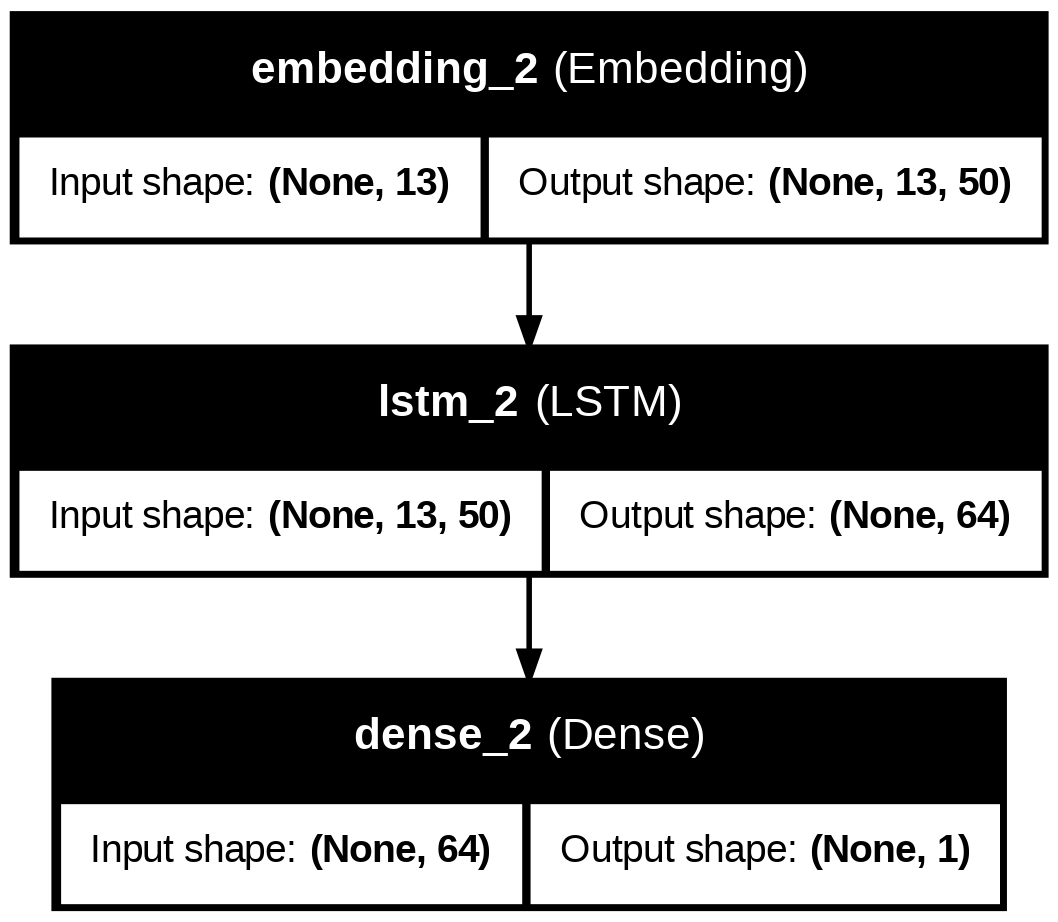

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
